In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore')

from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import data
main_df = pd.read_csv('C://Users//Shree123//depression_prediction//Data//mentalhealth_comments.csv')

In [3]:
df = main_df[['comment_id', 'comment_body']]

df.head()

,comment_id,comment_body
0,kf5y81z,"""avoid alcohol"" + ""socialize"" .....I don't und..."
1,kf5f93l,Who tf keeps a journal???
2,kf6eh7s,I actually do all those things. If I start let...
3,kf683kn,"""Avoid caffeine"" NO."
4,kf6c2c0,“Don’t do things that you know are bad for you...


In [4]:
df.shape

(2995, 2)

In [5]:
df.isnull().sum()

comment_id      0
comment_body    0
dtype: int64

In [6]:
# Character count
max_len = max(df['comment_body'].apply(len))
print(f'Maximum Character Length in the Corpus :: {max_len}')

min_len = min(df['comment_body'].apply(len))
print(f'Minimum Character Length in the Corpus :: {min_len}')

df['char_count'] = df['comment_body'].apply(len)
df['word_count'] = df['comment_body'].apply(lambda x: len(sent_tokenize(x)))
df['sentence_count'] = df['comment_body'].apply(lambda x: len(sent_tokenize(x)))

Maximum Character Length in the Corpus :: 1588
Minimum Character Length in the Corpus :: 3


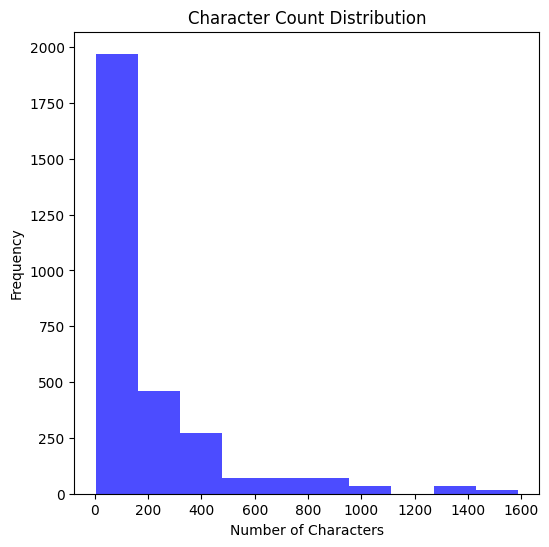

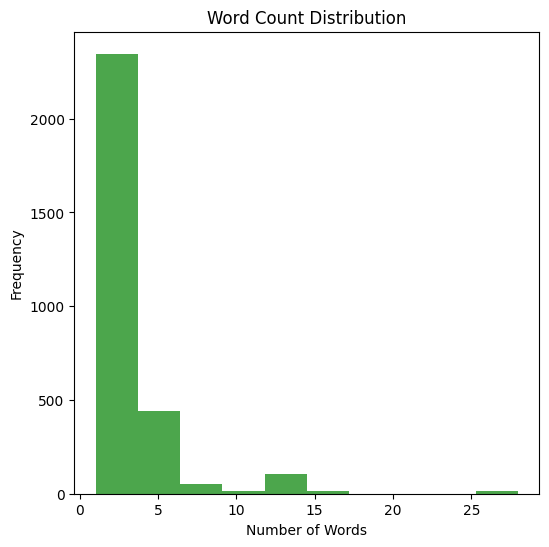

In [7]:
# Plot distributions of text lengths
plt.figure(figsize=(6, 6))
plt.hist(df['char_count'], bins=10, color='blue', alpha=0.7)
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(df['word_count'], bins=10, color='green', alpha=0.7)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Number of unique words: 1413
Most common words: [('good', 687), ('like', 514), ('people', 510), ('things', 498), ('one', 465), ('time', 411), ('get', 396), ('mental', 394), ('health', 342), ('bad', 341)]


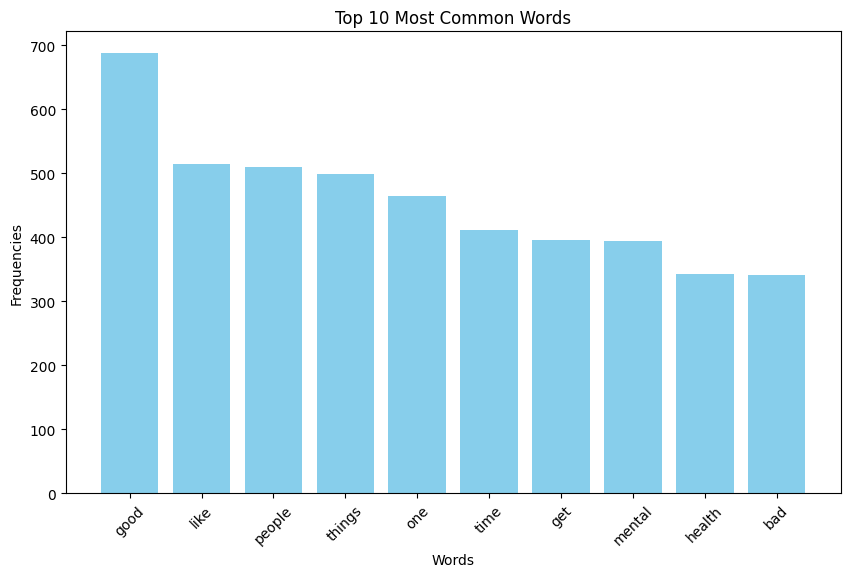

In [8]:
all_words = ' '.join(df['comment_body']).lower()
tokens = word_tokenize(all_words)
tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

# Counting unique words
unique_words = set(tokens)
print(f'Number of unique words: {len(unique_words)}')

# Identifying the most common words and their frequencies
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)
print('Most common words:', common_words)

words, frequencies = zip(*common_words)

# Visualizing the common words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [9]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return text

df['cleaned_comment_text'] = df['comment_body'].apply(preprocess_text)

In [10]:
df.iloc[:5,-1]

0              avoid alcohol socialize dont understand
1                                     tf keeps journal
2    actually things start letting practices slip s...
3                                       avoid caffeine
4     dont things know bad much keep track fucking lol
Name: cleaned_comment_text, dtype: object

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer(text):
    scores = vader_analyzer.polarity_scores(text)
    compound_score = scores['compound']
    return 'positive' if compound_score >= 0 else 'negative'    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
df['sentiment'] = df['cleaned_comment_text'].apply(sentiment_analyzer)
df.head()

,comment_id,comment_body,char_count,word_count,sentence_count,cleaned_comment_text,sentiment
0,kf5y81z,"""avoid alcohol"" + ""socialize"" .....I don't und...",53,1,1,avoid alcohol socialize dont understand,negative
1,kf5f93l,Who tf keeps a journal???,25,2,2,tf keeps journal,positive
2,kf6eh7s,I actually do all those things. If I start let...,792,14,14,actually things start letting practices slip s...,positive
3,kf683kn,"""Avoid caffeine"" NO.",20,1,1,avoid caffeine,negative
4,kf6c2c0,“Don’t do things that you know are bad for you...,99,1,1,dont things know bad much keep track fucking lol,positive


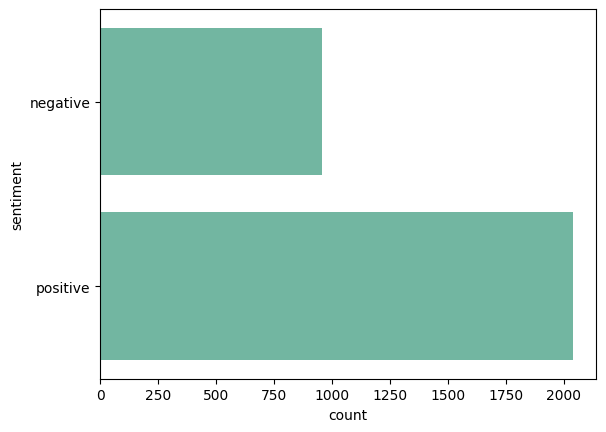

In [13]:
sns.set_palette('Set2')
sns.countplot(df['sentiment'])
plt.show()

In [14]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_comment_text'].apply(word_tokenize)
df['tokens']

0           [avoid, alcohol, socialize, dont, understand]
1                                    [tf, keeps, journal]
2       [actually, things, start, letting, practices, ...
3                                       [avoid, caffeine]
4       [dont, things, know, bad, much, keep, track, f...
                              ...                        
2990        [liter, waterday, healthy, amount, weigh, lb]
2991    [unironically, reminded, go, basic, task, thanks]
2992                [good, diet, n, good, sleep, u, need]
2993                                 [mean, little, porn]
2994                                        [wrong, porn]
Name: tokens, Length: 2995, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(max_features=5)

X = vectorizer.fit_transform(df['cleaned_comment_text'])

print(X.toarray())

[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 2 1 0 1]
 ...
 [0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [17]:
y = df[['sentiment']]

Since there is a potential class imbalance I would be performing SMOTE oversampling

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [20]:
X_train_res.shape, y_train_res.shape, X_test.shape, y_test.shape

((3260, 5), (3260, 1), (599, 5), (599, 1))

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.45      0.52       191
    positive       0.77      0.88      0.82       408

    accuracy                           0.74       599
   macro avg       0.70      0.66      0.67       599
weighted avg       0.72      0.74      0.72       599



In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

enc_y_train = le.fit_transform(y_train_res)

enc_y_test = le.fit_transform(y_test)

In [24]:
from xgboost import XGBClassifier

In [25]:
model = XGBClassifier(random_state = 42)
model.fit(X_train_res, enc_y_train)
y_pred = model.predict(X_test)

print(f'classification report with XGB \n:: {classification_report(enc_y_test, y_pred)}')

classification report with XGB 
::               precision    recall  f1-score   support

           0       0.62      0.45      0.52       191
           1       0.77      0.88      0.82       408

    accuracy                           0.74       599
   macro avg       0.70      0.66      0.67       599
weighted avg       0.72      0.74      0.72       599



Checking the Model Performance on the Unseen Data

In [26]:
import joblib as jb

In [27]:
jb.dump(model, 'XGB_model.pkl')

jb.dump(classifier, "RF_model.pkl")

['RF_model.pkl']

In [28]:
model = jb.load('XGB_model.pkl')

rf_model = jb.load('RF_model.pkl')

In [29]:
# Sample tweets

tweet1 = ['Today I felt the sun on my face and for a moment, everything felt okay. Taking one step at a time, finding small joys in the journey. #MentalHealthAwareness #StayStrong']

tweet2 = ['Feeling overwhelmed and lost in this darkness. It’s like a heavy cloud that I can’t shake off. Just tired of fighting. #Depression #MentalHealth']

tweet3 = ['I made it through. Grateful for small victories. #KeepGoing 💪']

tweet4 = ['good therapy session today. Feeling hopeful']

In [30]:
cleaned_text_1 = [preprocess_text(text) for text in tweet3]

print(cleaned_text_1)

vectorized_text_1 = vectorizer.transform(cleaned_text_1)

vectorized_text_1


['made grateful small victories keepgoing 💪']


<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [31]:
predictions = rf_model.predict(vectorized_text_1)

In [32]:
predictions

array(['positive'], dtype=object)

After Comparative Analysis and Generalization capabilities of both the models I can conclude that RF model provides better and realistic results

In [33]:
jb.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']